In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
my_results_path = "outputs"
sota_results_path = "sota_results"

methods_sota = ["simod", "dsim", "rims"]
my_methods = ["prob", "det"]
casestudies = ["purchasing", "acr", "cvs", "bpi12", "bpi17"]
metrics = ["ngd", "ctd", "car"]
entropy_metrics = ["etd_entropy"]
rule_metrics = ["rule_cfd", "rule_atd", "rule_etd", "rule_wtd"]
depth_range = list(range(6))
best_depth = 5

In [3]:
def load_sota_results():
    data = {}
    for method in methods_sota:
        data[method] = {}
        for case in casestudies:
            path = os.path.join(sota_results_path, method, case, "distances.json")
            if os.path.exists(path):
                with open(path, "r") as f:
                    results = json.load(f)
                for metric in metrics + entropy_metrics:
                    val = np.mean(results.get(metric, []))
                    data[method].setdefault(case, {})[metric] = val
    return data

sota_data = load_sota_results()


In [4]:
def load_my_results():
    data = {method: {} for method in my_methods}
    for method in my_methods:
        for case in casestudies:
            path = os.path.join(my_results_path, case, "distances.json")
            if os.path.exists(path):
                with open(path, "r") as f:
                    results = json.load(f)
                for depth in depth_range:
                    key = f"maxdepth_{depth}"
                    if key in results.get(method, {}):
                        for metric in metrics + entropy_metrics:
                            vals = results[method][key].get(metric, [])
                            mean = np.mean(vals) if vals else np.nan
                            std = np.std(vals) if vals else np.nan
                            data[method].setdefault(case, {}).setdefault(metric, {})[depth] = (mean, std)
    return data

my_data = load_my_results()


In [5]:
def generate_comparison_table(depth):
    rows = []
    for case in casestudies:
        for metric in ["ctd", "car"]:
            row = {"Case Study": case, "Metric": metric}
            row["prob_d0"] = my_data["prob"].get(case, {}).get(metric, {}).get(0, (np.nan,))[0]
            row[f"prob_d{depth}"] = my_data["prob"].get(case, {}).get(metric, {}).get(depth, (np.nan,))[0]
            rows.append(row)

    df = pd.DataFrame(rows)
    df.set_index(["Case Study", "Metric"], inplace=True)

    # Highlight min values
    styled = df.style.highlight_min(axis=1, color='green')
    return df, styled

df_min, styled_min = generate_comparison_table(best_depth)
styled_min


In [6]:
def generate_comparison_table(depth):
    rows = []
    for case in casestudies:
        for metric in ["ctd", "car"]:
            row = {"Case Study": case, "Metric": metric}
            row[f"prob_d{depth}"] = my_data["prob"].get(case, {}).get(metric, {}).get(depth, (np.nan,))[0]
            row[f"det_d{depth}"] = my_data["det"].get(case, {}).get(metric, {}).get(depth, (np.nan,))[0]
            rows.append(row)

    df = pd.DataFrame(rows)
    df.set_index(["Case Study", "Metric"], inplace=True)

    # Highlight min values
    styled = df.style.highlight_min(axis=1, color='green')
    return df, styled

df_min, styled_min = generate_comparison_table(best_depth)
styled_min


In [7]:
def generate_comparison_table(depth):
    rows = []
    for case in casestudies:
        for metric in metrics:
            row = {"Case Study": case, "Metric": metric}

            # SOTA methods
            for method in methods_sota:
                val = sota_data.get(method, {}).get(case, {}).get(metric, np.nan)
                row[method] = val

            # My methods
            row[f"prob_d{depth}"] = my_data["prob"].get(case, {}).get(metric, {}).get(depth, (np.nan,))[0]

            rows.append(row)

    df = pd.DataFrame(rows)
    df.set_index(["Case Study", "Metric"], inplace=True)

    # Highlight min values
    styled = df.style.highlight_min(axis=1, color='green').highlight_max(axis=1, color='red')
    return df, styled

df_min, styled_min = generate_comparison_table(best_depth)
styled_min


In [8]:
def generate_comparison_table(depth):
    rows = []
    for case in casestudies:
        for metric in metrics:
            row = {"Case Study": case, "Metric": metric}

            # SOTA methods
            for method in ["simod"]:
                val = sota_data.get(method, {}).get(case, {}).get(metric, np.nan)
                row[method] = val

            # My methods
            row[f"prob_d{depth}"] = my_data["prob"].get(case, {}).get(metric, {}).get(depth, (np.nan,))[0]

            rows.append(row)

    df = pd.DataFrame(rows)
    df.set_index(["Case Study", "Metric"], inplace=True)

    # Highlight min values
    styled = df.style.highlight_min(axis=1, color='green')
    return df, styled

df_min, styled_min = generate_comparison_table(best_depth)
styled_min


In [9]:
methods = ['simod', 'maxdepth_5']

rows = []

for case in casestudies:
    filename = f'outputs/rule_distances_{case}.json'
    if os.path.exists(filename):
        with open(filename) as f:
            data = json.load(f)
            for metric in rule_metrics:
                row = {
                    'Case Study': case,
                    'Metric': metric
                }
                for method in methods:
                    row[method] = data.get(metric, {}).get(method, None)
                rows.append(row)
    else:
        print(f"Warning: File {filename} not found")

df = pd.DataFrame(rows)
df.set_index(["Case Study", "Metric"], inplace=True)

styled = df.style.highlight_min(axis=1, color='green')
styled

In [10]:
def generate_entropy_comparison_table(depth):
    rows = []
    for case in casestudies:
        for metric in entropy_metrics:
            row = {"Case Study": case, "Metric": metric}

            for method in methods_sota:
                val = sota_data.get(method, {}).get(case, {}).get(metric, np.nan)
                row[method] = val

            row[f"prob_d{depth}"] = my_data["prob"].get(case, {}).get(metric, {}).get(depth, (np.nan,))[0]
            row[f"det_d{depth}"] = my_data["det"].get(case, {}).get(metric, {}).get(depth, (np.nan,))[0]

            rows.append(row)

    df = pd.DataFrame(rows)
    df.set_index(["Case Study", "Metric"], inplace=True)

    styled = df.style.highlight_max(axis=1, color='green').highlight_min(axis=1, color='red')
    return df, styled

df_max, styled = generate_entropy_comparison_table(best_depth)
styled

,,simod,dsim,rims,prob_d5,det_d5
Case Study,Metric,,,,,
purchasing,etd_entropy,1.331335,1.160079,1.196356,1.380686,0.564997
acr,etd_entropy,1.005804,0.740469,0.593001,1.149228,0.845624
cvs,etd_entropy,0.640277,0.566857,0.575200,0.366053,0.078767
bpi12,etd_entropy,1.654026,0.431299,0.557028,2.245392,0.599924
bpi17,etd_entropy,1.975552,0.603484,0.611401,2.208731,0.758401


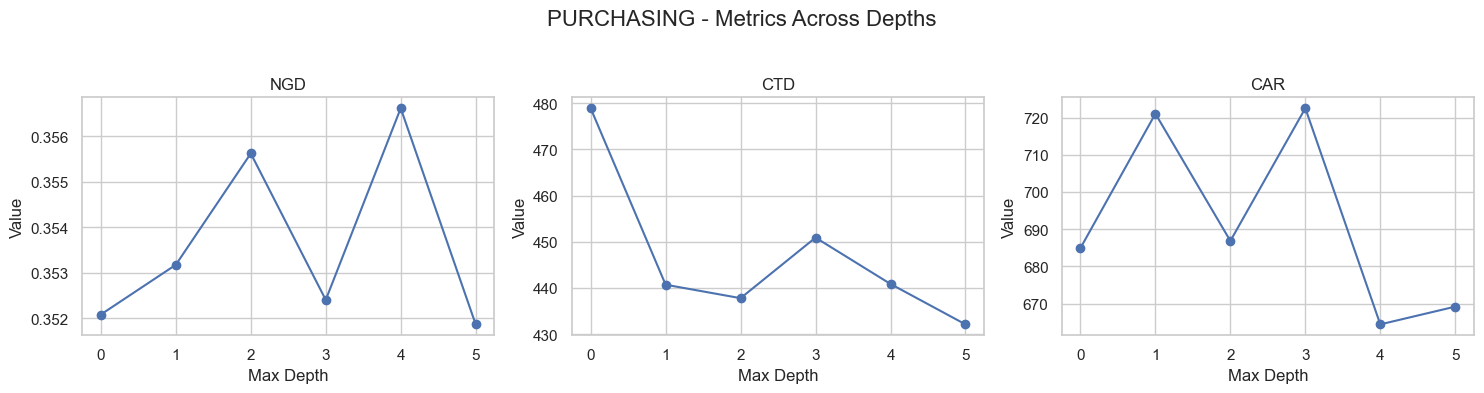

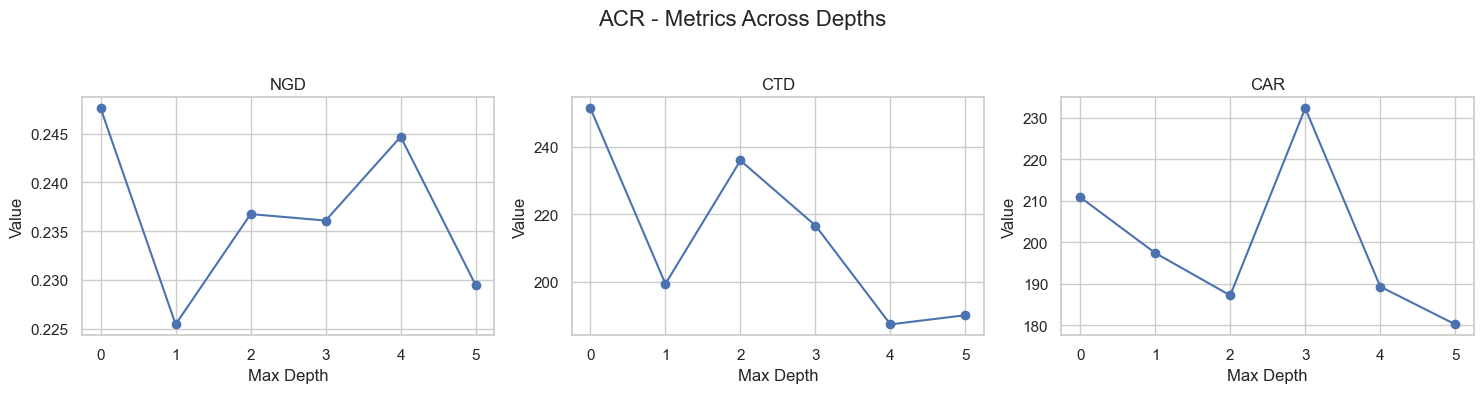

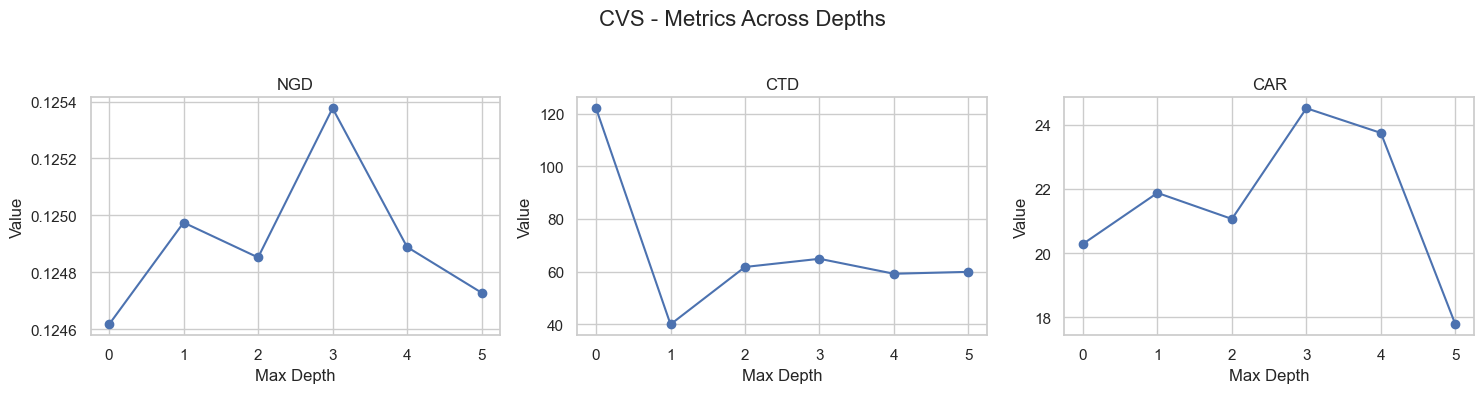

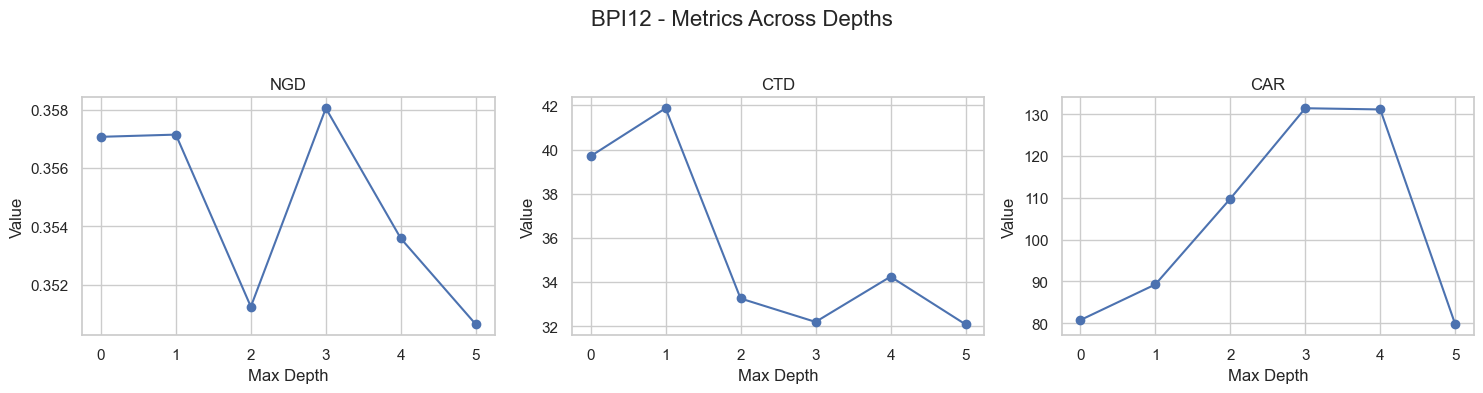

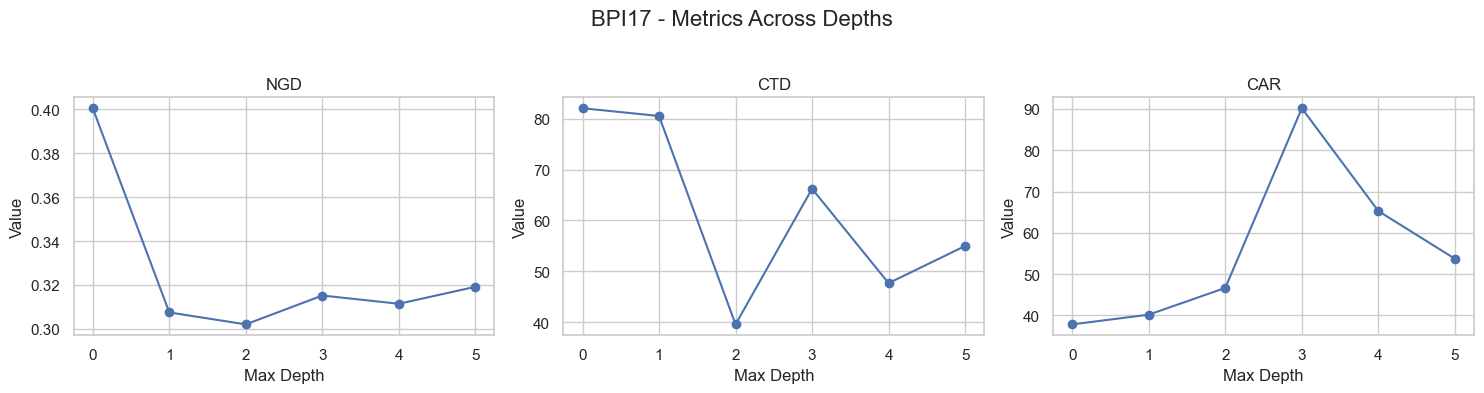

In [11]:
def plot_my_prob_depth_subplots():
    for case in casestudies:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))
        axes = axes.flatten()
        fig.suptitle(f"{case.upper()} - Metrics Across Depths", fontsize=16)

        for i, metric in enumerate(metrics):
            depths = []
            means = []
            stds = []
            for d in range(0, 6):  # Depths 1 to 5
                val = my_data["prob"].get(case, {}).get(metric, {}).get(d, (np.nan, np.nan))
                depths.append(d)
                means.append(val[0])
                stds.append(val[1])

            ax = axes[i]
            ax.plot(depths, means, marker='o')
            # ax.errorbar(depths, means, yerr=stds, fmt='-o', capsize=4)
            ax.set_title(metric.upper())
            ax.set_xlabel("Max Depth")
            ax.set_ylabel("Value")
            ax.set_xticks(depths)
            # ax.grid(True)

        # Hide unused subplots if any
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

plot_my_prob_depth_subplots()
